Name : Muhammad Ihza Mahendra

NIM  : 1301174682

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt

In [2]:
!git clone https://github.com/zaza-ipynb/Data-Mining-Cup-2019.git
!unzip -o Data-Mining-Cup-2019/dmc.zip

Cloning into 'Data-Mining-Cup-2019'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.
Archive:  Data-Mining-Cup-2019/dmc.zip
  inflating: DMC_2019_task/DATA-MINING-CUP-2019-features.pdf  
  inflating: DMC_2019_task/DATA-MINING-CUP-2019-task.pdf  
  inflating: DMC_2019_task/test.csv  
  inflating: DMC_2019_task/train.csv  


In [3]:
df = pd.read_csv('DMC_2019_task/train.csv', sep='|')
pred = pd.read_csv('DMC_2019_task/test.csv', sep='|')
real = pd.read_csv('Data-Mining-Cup-2019/DMC-2019-realclass.csv', sep='|')

In [4]:
df.shape, pred.shape, real.shape

((1879, 10), (498121, 9), (498121, 1))

### Data Overview

In [ ]:
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [ ]:
pred.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [ ]:
real.head()

,fraud
0,0
1,0
2,0
3,0
4,0


### Class Distribution & Analysis of Data Characteristic

In [ ]:
print('fraud :',(df['fraud'] == 1).sum())
print('not fraud :',(df['fraud'] == 0).sum())
print('percentage fraudulent :', len(df[df.fraud ==1])/len(df)*100, '%')
print('percentage non-fraudulent :', len(df[df.fraud ==0])/len(df)*100, '%')

fraud : 104
not fraud : 1775
percentage fraudulent : 5.534858967535923 %
percentage non-fraudulent : 94.46514103246408 %


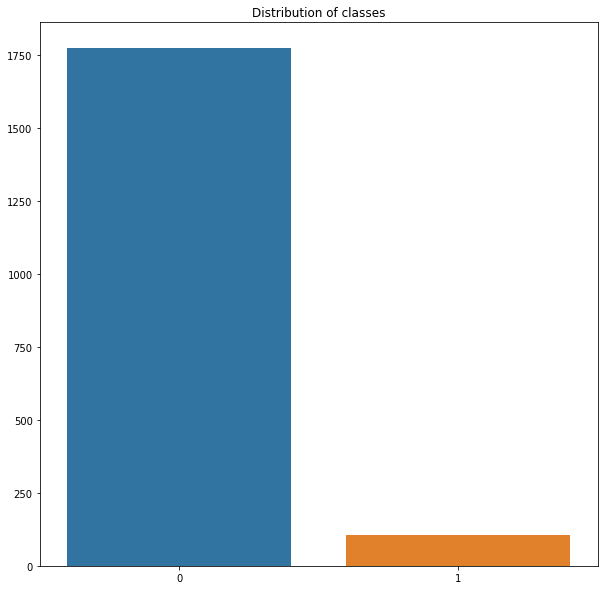

In [ ]:
counts = [df[df.fraud == 0].count()[0], df[df.fraud == 1].count()[0]]
plt.figure(figsize=(10,10))
plt.title("Distribution of classes")
sns.barplot(x=[0,1], y=counts)

Distribusi observasi sangat tidak seimbang. Ini dapat menyebabkan situasi ketika model akan belajar untuk mengklasifikasikan semua contoh sebagai negatif yang akan menghasilkan akurasi tinggi dengan nilai aktual nol.

Sebelum melihat klasifikasi, mari kita selidiki fitur-fiturnya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [ ]:
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


### Distribusi Fitur

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


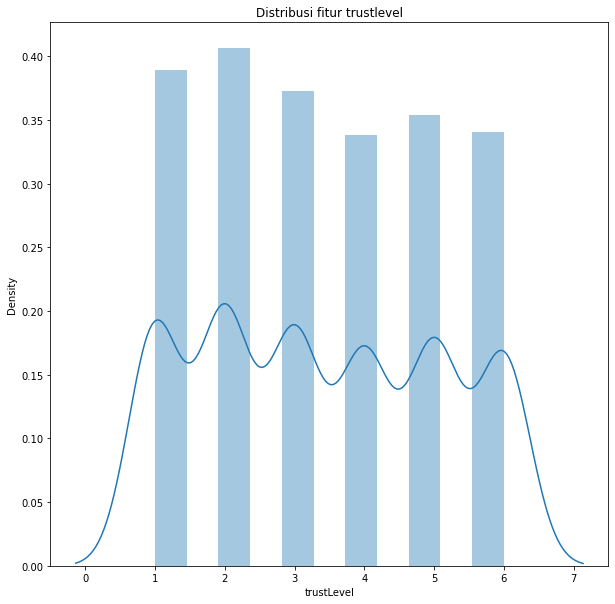

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur trustlevel")
sns.distplot(df.trustLevel, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


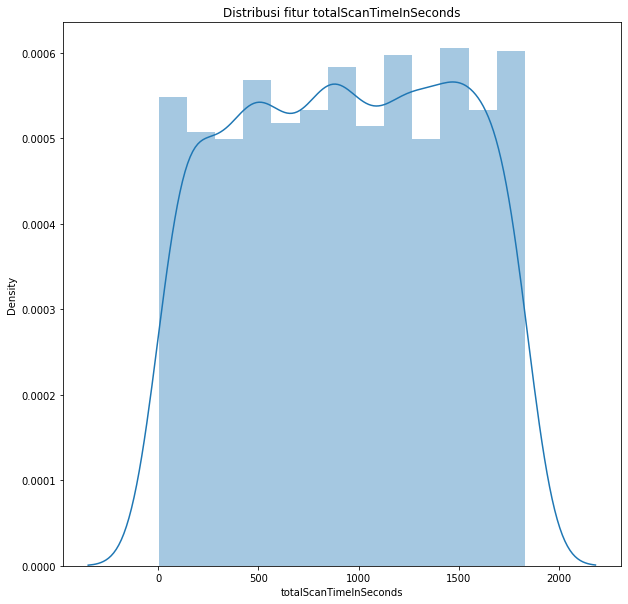

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur totalScanTimeInSeconds")
sns.distplot(df.totalScanTimeInSeconds, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


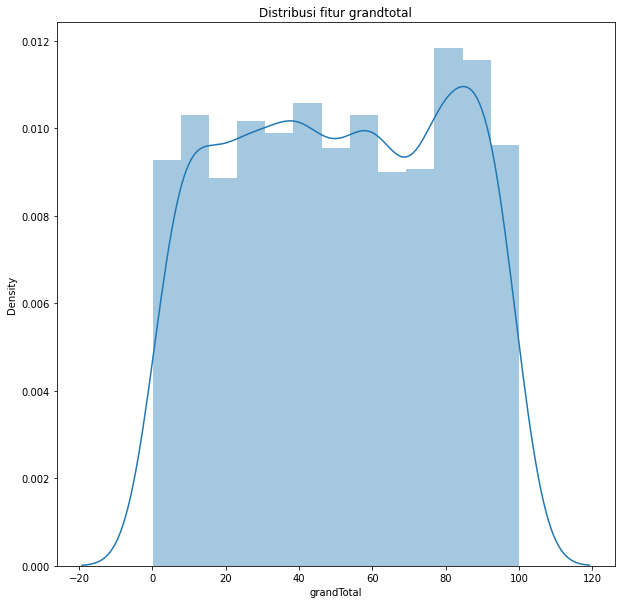

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur grandtotal")
sns.distplot(df.grandTotal, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


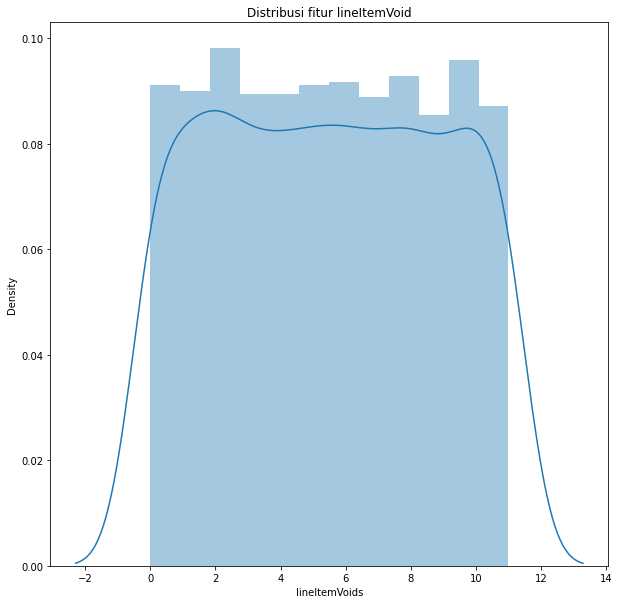

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur lineItemVoid")
sns.distplot(df.lineItemVoids, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


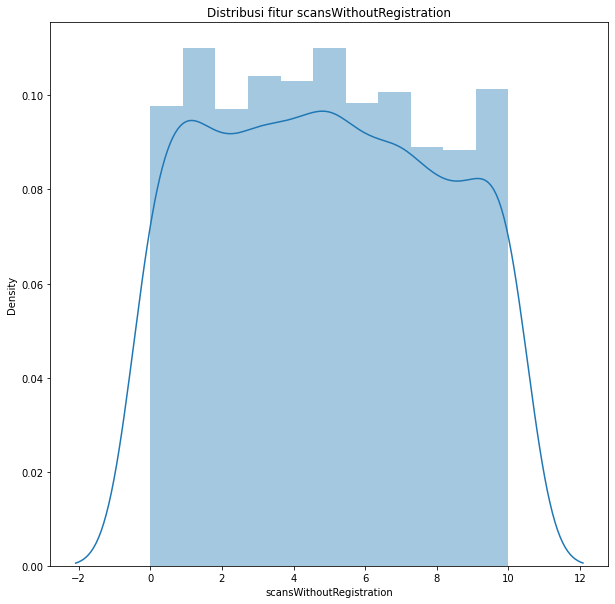

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur scansWithoutRegistration")
sns.distplot(df.scansWithoutRegistration, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


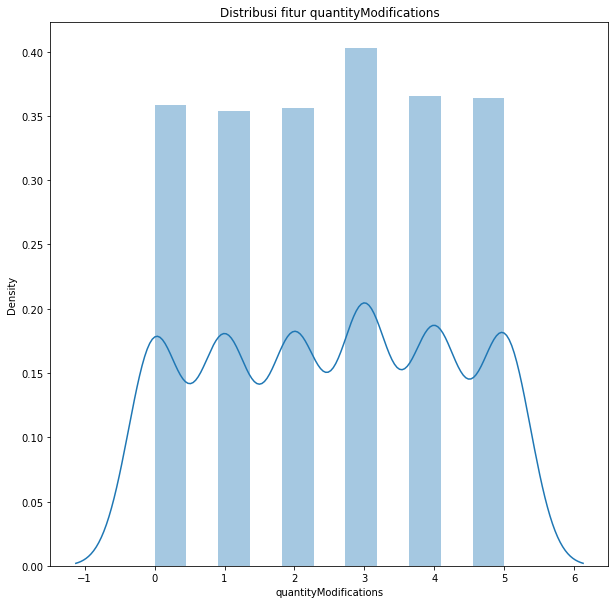

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur quantityModifications")
sns.distplot(df.quantityModifications, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


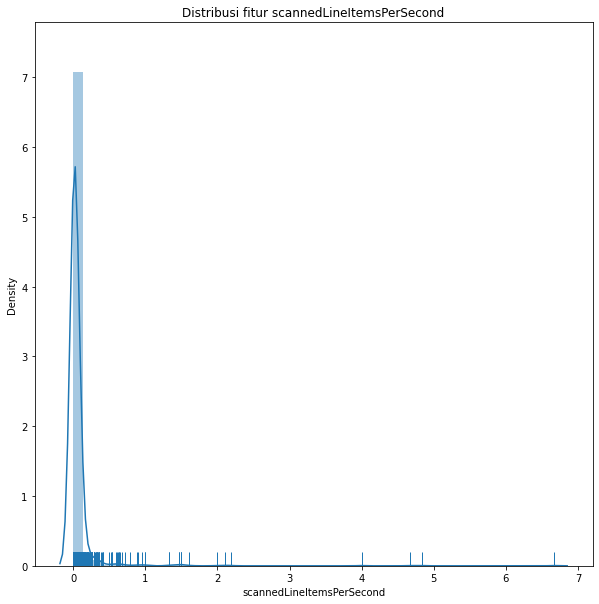

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur scannedLineItemsPerSecond")
sns.distplot(df.scannedLineItemsPerSecond, kde=True, rug=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


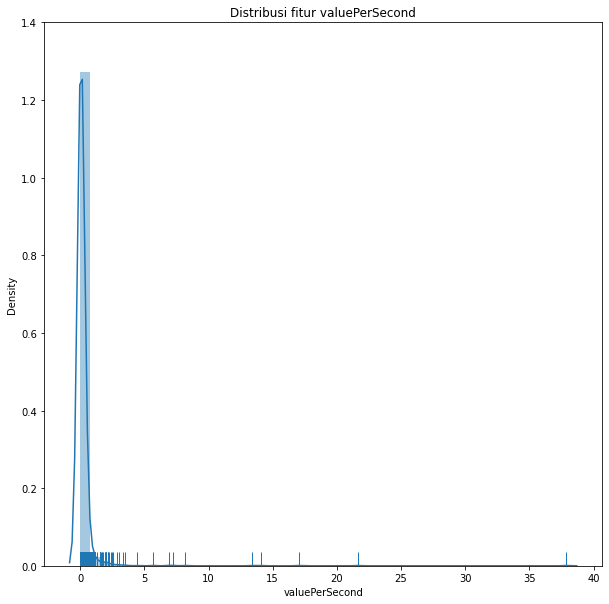

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur valuePerSecond")
sns.distplot(df.valuePerSecond, kde=True, rug=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


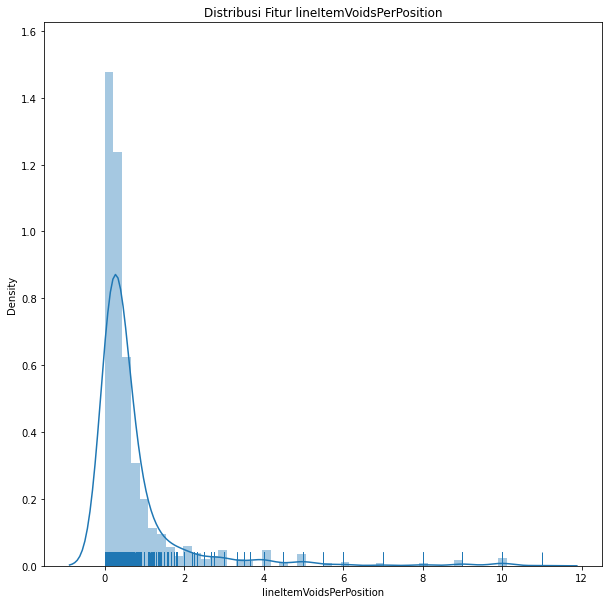

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi Fitur lineItemVoidsPerPosition")
sns.distplot(df.lineItemVoidsPerPosition, kde=True, rug=True)

Distribusi beberapa fitur agak teratur dan datar di seluruh spektrum nilai sedangkan untuk fitur lainnya sangat condong ke sisi kiri. 

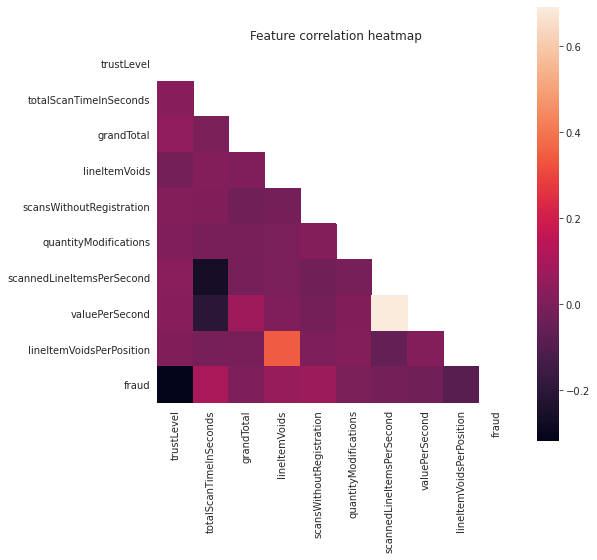

In [ ]:
cmatrix = df.corr()
mask = np.zeros_like(cmatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(8,8))
    plt.title("Feature correlation heatmap")
    sns.heatmap(cmatrix, mask=mask, square=True)

In [ ]:
df.corr().fraud

trustLevel                  -0.319765
totalScanTimeInSeconds       0.110414
grandTotal                   0.001421
lineItemVoids                0.063496
scansWithoutRegistration     0.074123
quantityModifications       -0.000864
scannedLineItemsPerSecond   -0.023085
valuePerSecond              -0.028873
lineItemVoidsPerPosition    -0.090116
fraud                        1.000000
Name: fraud, dtype: float64

Tidak banyak yang terjadi dalam heatmap correlation. Selain fitur yang jelas berkorelasi (seperti valuePerSecond dan scannedLineItemsPerSecond) kami tidak mengamati nilai yang signifikan. Waktu pemindaian berkorelasi negatif dengan kecepatan pemindaian dan sedikit korelasi negatif dapat diamati antara trustLevel dan kelas yang ditugaskan. Mari kita lihat lebih dekat fitur trustLevel.

<h1> TrustLevel </h1>
Tampaknya trustlevel tidak berkorelasi secara signifikan dengan nilai kelas tetapi mungkin disebabkan oleh distribusi antar kelas yang sangat tidak merata. Mungkin menguntungkan untuk memeriksa bagaimana fitur ini didistribusikan di antara transaksi fraud dan non-fraud secara terpisah. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


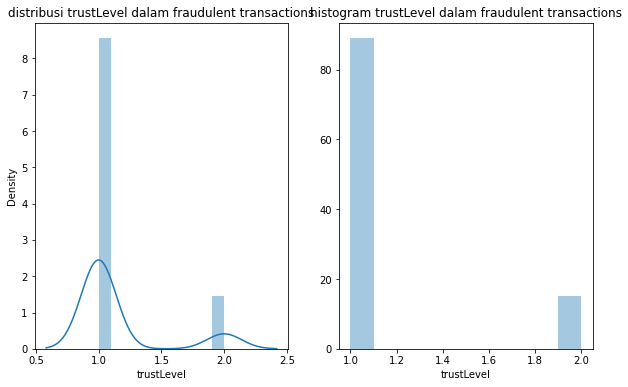

In [ ]:
figure = plt.figure(figsize=(10,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)
ax1.set_title("distribusi trustLevel dalam fraudulent transactions")
ax2.set_title("histogram trustLevel dalam fraudulent transactions")
sns.distplot(df[df['fraud']==1].trustLevel, kde=True, ax=ax1)
sns.distplot(df[df['fraud']==1].trustLevel, kde=False, ax=ax2)

Nilai fitur trustLevel yang unik di antara transaksi penipuan-postive.

In [ ]:
df[df['fraud']==1].trustLevel.unique()

array([1, 2])

Tampaknya korelasi mungkin telah hilang dalam noise/outliers yang disebabkan oleh distribusi data. Dalam subgroup transaksi fraud, hanya trustlevel 1 dan 2 yang muncul.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


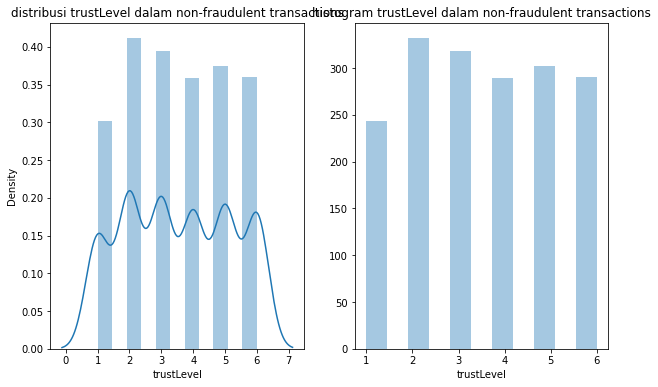

In [ ]:
figure = plt.figure(figsize=(10,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)
ax1.set_title("distribusi trustLevel dalam non-fraudulent transactions")
ax2.set_title("histogram trustLevel dalam non-fraudulent transactions")
sns.distplot(df[df['fraud']==0].trustLevel, kde=True, ax=ax1)
sns.distplot(df[df['fraud']==0].trustLevel, kde=False, ax=ax2)

Nilai fitur trustLevel yang unik di antara transaksi fraud-negatif.

In [ ]:
df[df['fraud']==0].trustLevel.unique()

array([5, 3, 6, 2, 4, 1])

Dalam kasus transaksi non-fraud, distibusinya lebih merata. Meskipun ada penurunan yang signifikan dari transaksi dengan trustlevel sama dengan 1. trustLevel dapat menjadi indikator yang baik apakah klien meminta cek lanjutan tetapi tidak pada akhirnya membedakan transaksi fraud dan non-fraud.

### Pembuatan subset data, Preprocessing, Feature Engineering

Membuat fitur baru (feature engineering dengan list comprehension yaitu total items yaitu jumlah keseluruhan barang dalam satu transaksi) dan percobaan downsampling agar kelas seimbang

In [ ]:
from tqdm import tqdm

df['TotalItemsScanned'] = [df.iloc[i].totalScanTimeInSeconds * df.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(df)))]
pred['TotalItemsScanned'] = [pred.iloc[i].totalScanTimeInSeconds * pred.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [02:39<00:00, 3123.45it/s]


In [ ]:
# avgValuePerScan:
df['avgTimePerScanItem'] = [1/ df.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(df)))]
df['avgValuePerScanItem'] = [df.iloc[i].avgTimePerScanItem * df.iloc[i].valuePerSecond for i in tqdm(range(len(df)))] 

# manual feature generation - "totalItemsScanned" ratios

# withoutRegisPerPosition
df['WithoutRegisPerPosition'] =[df.iloc[i].scansWithoutRegistration / df.iloc[i].TotalItemsScanned for i in tqdm(range(len(df)))]
# rasio scansWithoutRegis dalam totalScan
# setara dengan lineItemVoidsPerPosition
# Mungkin menunjukkan seberapa baru atau ambivalennya seorang pelanggan. Diharapkan lebih tinggi untuk "trustLevel" rendah
# quantiModPerPosition
df['quantiModPerPosition'] = [df.iloc[i].quantityModifications / df.iloc[i].TotalItemsScanned for i in tqdm(range(len(df)))]
# ratio dari quanityMods dalam TotalItemsScanned



# manual feature generation - "grandTotal" ratios

# lineItemVoidsPerTotal
df['lineItemVoidsPerTotal'] = [df.iloc[i].lineItemVoids / df.iloc[i].grandTotal for i in tqdm(range(len(df)))]

# withoutRegisPerTotal
df['withoutRegisPerTotal'] = [df.iloc[i].scansWithoutRegistration / df.iloc[i].grandTotal for i in tqdm(range(len(df)))]

# quantiModPerTotal
df['quantiModPerTotal'] = [df.iloc[i].quantityModifications / df.iloc[i].grandTotal for i in tqdm(range(len(df)))]



# manual feature generation - "totalScanTimeInSeconds" ratios

# lineItemVoidsPerTime
df['lineItemVoidsPerTime'] = [df.iloc[i].lineItemVoids / df.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(df)))]

# withoutRegisPerTime
df['withoutRegisPerTime'] = [df.iloc[i].scansWithoutRegistration / df.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(df)))]

# quantiModPerTime
df['quantiModPerTime'] = [df.iloc[i].quantityModifications / df.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(df)))]

100%|██████████| 1879/1879 [00:00<00:00, 2878.73it/s]


In [ ]:
#lakukan hal yang sama untuk data test
pred['avgTimePerScanItem'] = [1/ pred.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [01:21<00:00, 6115.94it/s]


In [ ]:
pred['avgValuePerScanItem'] = [pred.iloc[i].avgTimePerScanItem * pred.iloc[i].valuePerSecond for i in tqdm(range(len(pred)))] 

100%|██████████| 498121/498121 [02:46<00:00, 2991.81it/s]


In [ ]:
pred['WithoutRegisPerPosition'] =[pred.iloc[i].scansWithoutRegistration / pred.iloc[i].TotalItemsScanned for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [02:46<00:00, 2999.77it/s]


In [ ]:
pred['quantiModPerPosition'] = [pred.iloc[i].quantityModifications / pred.iloc[i].TotalItemsScanned for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [02:49<00:00, 2935.33it/s]


In [ ]:
pred['lineItemVoidsPerTotal'] = [pred.iloc[i].lineItemVoids / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]

  3%|▎         | 13620/498121 [00:04<02:43, 2971.38it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
  4%|▍         | 19751/498121 [00:06<02:36, 3061.86it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
100%|██████████| 498121/498121 [02:50<00:00, 2921.03it/s]


In [ ]:
pred['withoutRegisPerTotal'] = [pred.iloc[i].scansWithoutRegistration / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]

  3%|▎         | 13516/498121 [00:04<02:40, 3016.25it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
  6%|▌         | 30112/498121 [00:10<02:37, 2979.87it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
100%|██████████| 498121/498121 [02:50<00:00, 2916.15it/s]


In [ ]:
pred['quantiModPerTotal'] = [pred.iloc[i].quantityModifications / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]

  3%|▎         | 13583/498121 [00:04<02:53, 2797.32it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
 11%|█         | 54410/498121 [00:18<02:28, 2983.21it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
100%|██████████| 498121/498121 [02:55<00:00, 2838.42it/s]


In [ ]:
pred['lineItemVoidsPerTime'] = [pred.iloc[i].lineItemVoids / pred.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [02:54<00:00, 2848.13it/s]


In [ ]:
pred['withoutRegisPerTime'] = [pred.iloc[i].scansWithoutRegistration / pred.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [02:55<00:00, 2843.15it/s]


In [ ]:
pred['quantiModPerTime'] = [pred.iloc[i].quantityModifications / pred.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [02:59<00:00, 2778.29it/s]


In [ ]:
pred.columns.tolist()

['trustLevel',
 'totalScanTimeInSeconds',
 'grandTotal',
 'lineItemVoids',
 'scansWithoutRegistration',
 'quantityModifications',
 'scannedLineItemsPerSecond',
 'valuePerSecond',
 'lineItemVoidsPerPosition',
 'TotalItemsScanned',
 'avgTimePerScanItem',
 'avgValuePerScanItem',
 'WithoutRegisPerPosition',
 'quantiModPerPosition',
 'lineItemVoidsPerTotal',
 'withoutRegisPerTotal',
 'quantiModPerTotal',
 'lineItemVoidsPerTime',
 'withoutRegisPerTime',
 'quantiModPerTime']

In [ ]:
df.columns.tolist()

['trustLevel',
 'totalScanTimeInSeconds',
 'grandTotal',
 'lineItemVoids',
 'scansWithoutRegistration',
 'quantityModifications',
 'scannedLineItemsPerSecond',
 'valuePerSecond',
 'lineItemVoidsPerPosition',
 'fraud',
 'TotalItemsScanned',
 'avgTimePerScanItem',
 'avgValuePerScanItem',
 'WithoutRegisPerPosition',
 'quantiModPerPosition',
 'lineItemVoidsPerTotal',
 'withoutRegisPerTotal',
 'quantiModPerTotal',
 'lineItemVoidsPerTime',
 'withoutRegisPerTime',
 'quantiModPerTime']

In [ ]:
fraudulent = df[df['fraud']==1]
non_fraudulent = df[df['fraud']==0]
n = fraudulent.count()[0]
non_fraudulent_subset = non_fraudulent.sample(n)

In [ ]:
n_fraudulent = fraudulent.count()[0]
n_non_fraudulent = non_fraudulent.count()[0]
print("Fraudulent transactions: {}, non-fraudulent transactions: {}".format(n_fraudulent, n_non_fraudulent))

Fraudulent transactions: 104, non-fraudulent transactions: 1775


In [ ]:
fraudulent.reset_index(drop=True, inplace=True)
non_fraudulent_subset.reset_index(drop=True, inplace=True)
dfs = pd.concat([fraudulent, non_fraudulent_subset])

In [ ]:
print(dfs.count()[0])
dfs = dfs.sample(208).reset_index(drop=True)
dfs.head()

208


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,TotalItemsScanned,avgTimePerScanItem,avgValuePerScanItem,WithoutRegisPerPosition,quantiModPerPosition,lineItemVoidsPerTotal,withoutRegisPerTotal,quantiModPerTotal,lineItemVoidsPerTime,withoutRegisPerTime,quantiModPerTime
0,3,1690,3.59,3,9,3,0.013609,0.002124,0.130435,0,23.0,73.478261,0.156087,0.391304,0.130435,0.835655,2.506964,0.835655,0.001775,0.005325,0.001775
1,3,1488,53.87,7,9,1,0.017473,0.036203,0.269231,0,26.0,57.230769,2.071923,0.346154,0.038462,0.129942,0.167069,0.018563,0.004704,0.006048,0.000672
2,2,1759,98.46,5,4,4,0.015918,0.055975,0.178571,1,28.0,62.821429,3.516429,0.142857,0.142857,0.050782,0.040626,0.040626,0.002843,0.002274,0.002274
3,6,1659,52.53,2,1,4,0.012658,0.031664,0.095238,0,21.0,79.000000,2.501429,0.047619,0.190476,0.038073,0.019037,0.076147,0.001206,0.000603,0.002411
4,2,734,8.12,4,0,0,0.040872,0.011063,0.133333,0,30.0,24.466667,0.270667,0.000000,0.000000,0.492611,0.000000,0.000000,0.005450,0.000000,0.000000


In [ ]:
print(df.count()[0])

1879


In [ ]:
#Feature selection based on correlation score
correlation = df.corr().fraud
dropped = [i for i in correlation.index if correlation[i] > -0.05 and correlation[i] < 0.05]
dropped

['grandTotal',
 'quantityModifications',
 'scannedLineItemsPerSecond',
 'valuePerSecond',
 'lineItemVoidsPerTotal',
 'withoutRegisPerTotal',
 'quantiModPerTotal',
 'lineItemVoidsPerTime',
 'withoutRegisPerTime',
 'quantiModPerTime']

In [ ]:
#without downsampling
X_train = df.drop(columns=dropped+['fraud'])
y_train = df.fraud.values
X_test = pred.drop(columns=dropped)

#with downsampling
X = dfs.drop(columns=dropped+['fraud'])
y = dfs.fraud.values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.fit_transform(X)


### Visualization of data using t-SNE
t-Distributed Stochastic Neighbor Embedding adalah algoritma pengurangan dimensi non-linier yang digunakan untuk mengeksplorasi data berdimensi tinggi. Ini memetakan data multi-dimensi ke dua atau lebih dimensi yang cocok untuk pengamatan manusia.

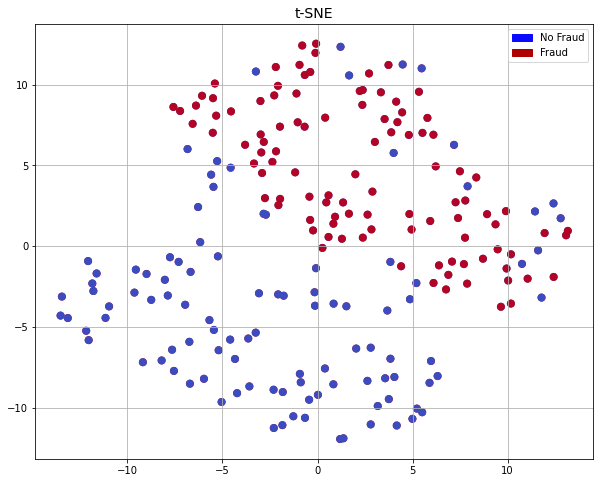

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches


reduced_x = TSNE(n_components=2, random_state=42).fit_transform(X)


f, ax = plt.subplots(figsize=(10,8))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(reduced_x[:,0], reduced_x[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(reduced_x[:,0], reduced_x[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

### Test on Imbalance Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
!pip install scikit-plot
import scikitplot as skplt

In [ ]:
X_imb = X_train
y_imb = y_train

X_train_imb, X_test_imb, y_train_imb, y_test_imb =  train_test_split(X_imb, y_imb, test_size=0.2)

clf_imb = clf = RandomForestClassifier(bootstrap=True,
                              max_depth=80,
                              max_features='sqrt',
                              min_samples_leaf=2,
                              min_samples_split=5,
                              n_estimators=1000)
clf_imb.fit(X_train_imb, y_train_imb)
clf_imb.score(X_test_imb, y_test_imb)

0.9893617021276596

In [ ]:
prob_y_imb = clf_imb.predict_proba(X_test_imb)
prob_y_imb = [p[1] for p in prob_y_imb]
roc_auc_score(y_test_imb, prob_y_imb)

0.9973172367538565

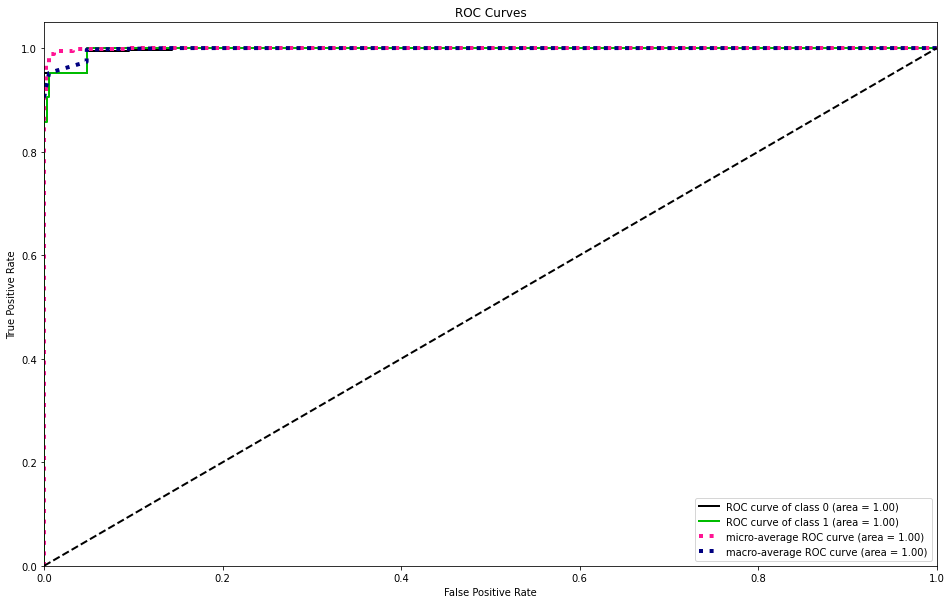

In [ ]:
prob_y_imb_vis = clf_imb.predict_proba(X_test_imb)
skplt.metrics.plot_roc(y_test_imb, prob_y_imb_vis, figsize=(16, 10))
plt.show()

### Test on Downsampling dataset

In [ ]:
X_down = X
y_down = y

X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, test_size=0.2)

clf_down = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=123) 
clf_down.fit(X_train_down, y_train_down)
clf_down.score(X_test_down, y_test_down)

0.9523809523809523

In [ ]:
prob_y_down = clf_down.predict_proba(X_test_down)
prob_y_down = [p[1] for p in prob_y_down]
roc_auc_score(y_test_down, prob_y_down)

0.9840909090909091

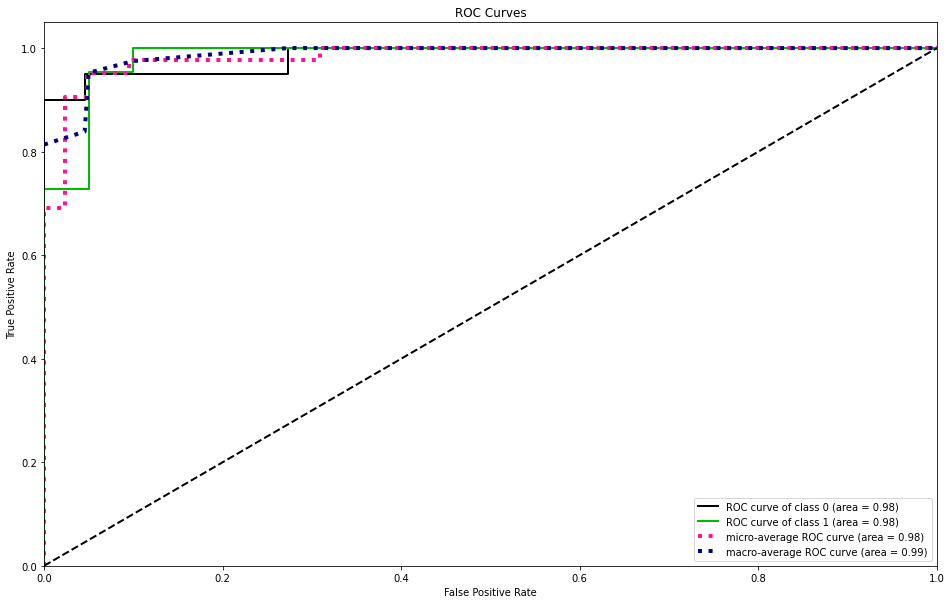

In [ ]:
prob_y_down_vis = clf_down.predict_proba(X_test_down)
skplt.metrics.plot_roc(y_test_down, prob_y_down_vis, figsize=(16, 10))
plt.show()

### Test on Oversampling Dataset

In [ ]:
df2 = df.drop(columns=dropped)
df_fraudlent_imbalanced = df2[df2['fraud'] == 1]
df_non_fraudlent_imbalanced = df2[df2['fraud'] == 0]
df_fraudlent_up = resample(df_fraudlent_imbalanced, 
                           replace=True, 
                           n_samples=1775, 
                           random_state=123)
df_upsampled = pd.concat([df_non_fraudlent_imbalanced, df_fraudlent_up])
df_upsampled.fraud.value_counts()

1    1775
0    1775
Name: fraud, dtype: int64

In [ ]:
df2

,trustLevel,totalScanTimeInSeconds,lineItemVoids,scansWithoutRegistration,lineItemVoidsPerPosition,fraud,TotalItemsScanned,avgTimePerScanItem,avgValuePerScanItem,WithoutRegisPerPosition,quantiModPerPosition
0,5,1054,7,0,0.241379,0,29.0,36.344828,1.886207,0.000000,0.103448
1,3,108,5,2,0.357143,0,14.0,7.714286,1.954286,0.142857,0.285714
2,3,1516,3,10,0.230769,0,13.0,116.615385,4.781538,0.769231,0.384615
3,6,1791,8,4,0.275862,0,29.0,61.758621,3.183103,0.137931,0.137931
4,5,430,3,7,0.111111,0,27.0,15.925926,3.019630,0.259259,0.074074
...,...,...,...,...,...,...,...,...,...,...,...
1874,1,321,8,7,0.347826,0,23.0,13.956522,3.305652,0.304348,0.086957
1875,1,397,5,5,0.192308,1,26.0,15.269231,1.611154,0.192308,0.000000
1876,4,316,5,8,0.166667,0,30.0,10.533333,1.394333,0.266667,0.033333
1877,2,685,1,6,0.041667,0,24.0,28.541667,2.611667,0.250000,0.083333


In [ ]:
X_up = df_upsampled.drop('fraud', axis=1)
y_up = df_upsampled['fraud']

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.2)

clf_up = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=123) 
clf_up.fit(X_train_up, y_train_up)
clf_up.score(X_test_up, y_test_up)

0.9971830985915493

In [ ]:
prob_y_up = clf_up.predict_proba(X_test_up)
prob_y_up = [p[1] for p in prob_y_up]
roc_auc_score(y_test_up, prob_y_up)

1.0

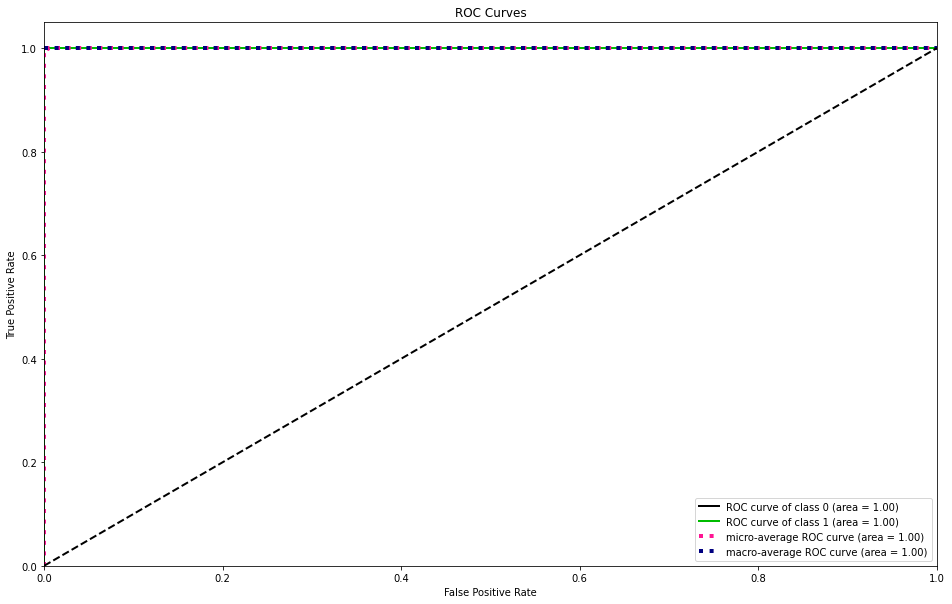

In [ ]:
prob_y_up_vis = clf_up.predict_proba(X_test_up)
skplt.metrics.plot_roc(y_test_up, prob_y_up_vis, figsize=(16, 10))
plt.show()

Precision: 0.9941520467836257, recall: 1.0, F1: 0.9970674486803519


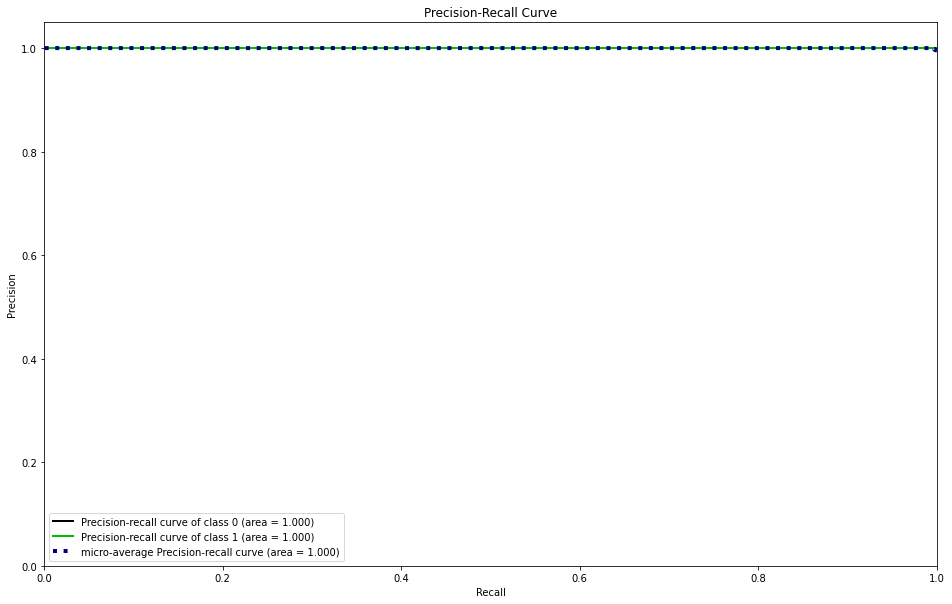

In [ ]:
y_up_pred = clf_up.predict(X_test_up)
precision_up = precision_score(y_test_up, y_up_pred)
recall_up = recall_score(y_test_up, y_up_pred)
f1_up = f1_score(y_test_up, y_up_pred)
print('Precision: {}, recall: {}, F1: {}'.format(precision_up, recall_up, f1_up))

skplt.metrics.plot_precision_recall(y_test_up, prob_y_up_vis, figsize = (16, 10))
plt.show()

### Model Prediction and Evaluation

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps
clfs = []
clfs.append(LogisticRegression(random_state=11))
clfs.append(SVC(kernel='poly', probability=True, degree = 20))
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier(random_state=0))
clfs.append(RandomForestClassifier(n_estimators=100))
clfs.append(GradientBoostingClassifier(n_estimators=100))

def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)  

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    predicted = cross_val_predict(pipeline, X_train, y_train)
    TP, FP, TN, FN = perf_measure(y_train, predicted)
    print('---------------------------- Actual Value--------------')
    print('---------------------------- |0 (no fraud)| 1 (fraud)--')
    print('Prediction-----|0 (no fraud) |',TN,'      |',FP)
    print('---------------|1 (fraud)    |',FN,'        |',TP)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    print(classification_report(predicted, y_train))
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------- Actual Value--------------
---------------------------- |0 (no fraud)| 1 (fraud)--
Prediction-----|0 (no fraud) | 1771       | 4
---------------|1 (fraud)    | 13         | 91
---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1784
           1       0.88      0.96      0.91        95

    accuracy                           0.99      1879
   macro avg       0.94      0.98      0.95      1879
weighted avg       0.99      0.99      0.99      1879

fit_time  mean  0.018247127532958984
fit_time  std  0.0019487187506036475


### Prediction using ground truth

In [ ]:
#Prediction ground truth using imbalance dataset
clf = LogisticRegression(random_state=11)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(prediction, real))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    476265
           1       0.86      0.93      0.89     21856

    accuracy                           0.99    498121
   macro avg       0.93      0.96      0.94    498121
weighted avg       0.99      0.99      0.99    498121



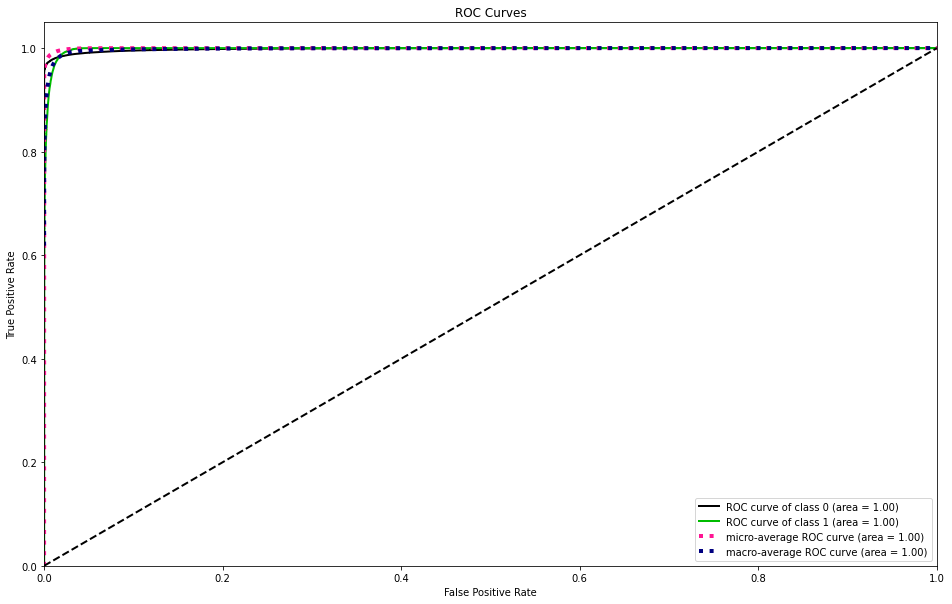

In [ ]:
prob_y_up_vis = clf.predict_proba(X_test)
skplt.metrics.plot_roc(real, prob_y_up_vis, figsize=(16, 10))
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
# TP, FP, TN, FN = perf_measure(real, prediction)
TN, FP, FN, TP = confusion_matrix(real, prediction).ravel()
print('---------------------------- Actual Value--------------')
print('---------------------------- |0 (no fraud)| 1 (fraud)--')
print('Prediction-----|0 (no fraud) |',TN,'      |',FP)
print('---------------|1 (fraud)    |',FN,'        |',TP)

---------------------------- Actual Value--------------
---------------------------- |0 (no fraud)| 1 (fraud)--
Prediction-----|0 (no fraud) | 472887       | 1507
---------------|1 (fraud)    | 3378         | 20349


In [ ]:
from sklearn.metrics import accuracy_score
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
for i in values:
    clf = LogisticRegression(random_state=i)
    clf.fit(X_train_imb, y_train_imb)
    # evaluate on the train dataset
    train_yhat = clf.predict(X_train_imb)
    train_acc = accuracy_score(y_train_imb, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = clf.predict(X_test_imb)
    test_acc = accuracy_score(y_test_imb, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.989, test: 0.997
>2, train: 0.989, test: 0.997
>3, train: 0.989, test: 0.997
>4, train: 0.989, test: 0.997
>5, train: 0.989, test: 0.997
>6, train: 0.989, test: 0.997
>7, train: 0.989, test: 0.997
>8, train: 0.989, test: 0.997
>9, train: 0.989, test: 0.997
>10, train: 0.989, test: 0.997
>11, train: 0.989, test: 0.997
>12, train: 0.989, test: 0.997
>13, train: 0.989, test: 0.997
>14, train: 0.989, test: 0.997
>15, train: 0.989, test: 0.997
>16, train: 0.989, test: 0.997
>17, train: 0.989, test: 0.997
>18, train: 0.989, test: 0.997
>19, train: 0.989, test: 0.997
>20, train: 0.989, test: 0.997


In [ ]:
#Prediction ground truth using oversampling dataset
clf.fit(X_up, y_up)
prediction = clf.predict(X_test)
prediction

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(prediction, real))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70    253800
           1       1.00      0.10      0.18    244321

    accuracy                           0.56    498121
   macro avg       0.77      0.55      0.44    498121
weighted avg       0.76      0.56      0.44    498121



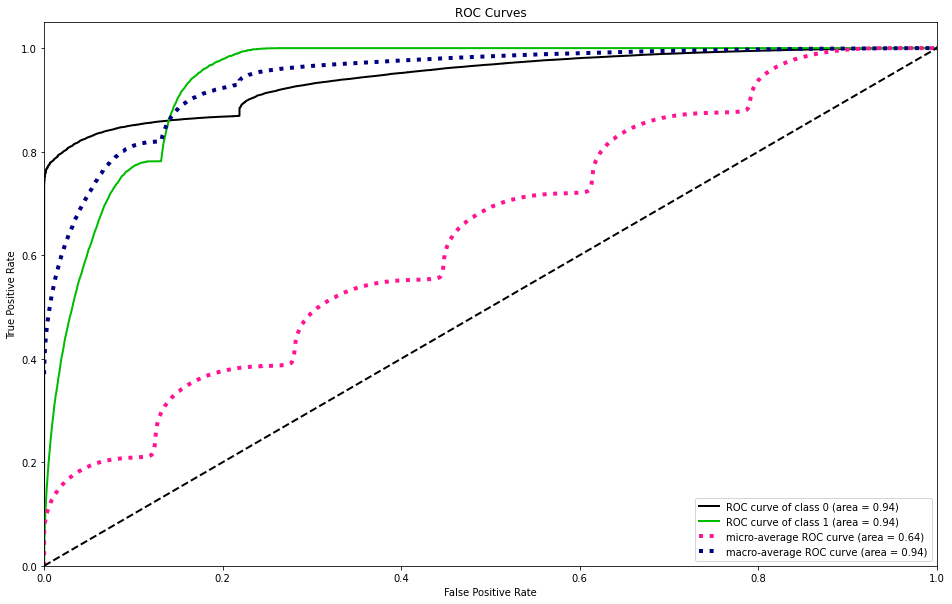

In [ ]:
prob_y_up_vis = clf.predict_proba(X_test)
skplt.metrics.plot_roc(real, prob_y_up_vis, figsize=(16, 10))
plt.show()

In [ ]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
for i in values:
    clf = LogisticRegression(random_state=i)
    clf.fit(X_train_up, y_train_up)
    # evaluate on the train dataset
    train_yhat = clf.predict(X_train_up)
    train_acc = accuracy_score(y_train_up, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = clf.predict(X_test_up)
    test_acc = accuracy_score(y_test_up, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


>1, train: 0.984, test: 0.983
>2, train: 0.984, test: 0.983
>3, train: 0.984, test: 0.983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


>4, train: 0.984, test: 0.983
>5, train: 0.984, test: 0.983
>6, train: 0.984, test: 0.983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


>7, train: 0.984, test: 0.983
>8, train: 0.984, test: 0.983
>9, train: 0.984, test: 0.983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


>10, train: 0.984, test: 0.983
>11, train: 0.984, test: 0.983
>12, train: 0.984, test: 0.983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


>13, train: 0.984, test: 0.983
>14, train: 0.984, test: 0.983
>15, train: 0.984, test: 0.983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


>16, train: 0.984, test: 0.983
>17, train: 0.984, test: 0.983
>18, train: 0.984, test: 0.983
>19, train: 0.984, test: 0.983
>20, train: 0.984, test: 0.983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#Prediction ground truth using downsampling
clf.fit(X, y)
prediction = clf.predict(X_test)
prediction

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
print(classification_report(prediction, real))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81    325664
           1       1.00      0.14      0.24    172457

    accuracy                           0.70    498121
   macro avg       0.84      0.57      0.53    498121
weighted avg       0.80      0.70      0.62    498121



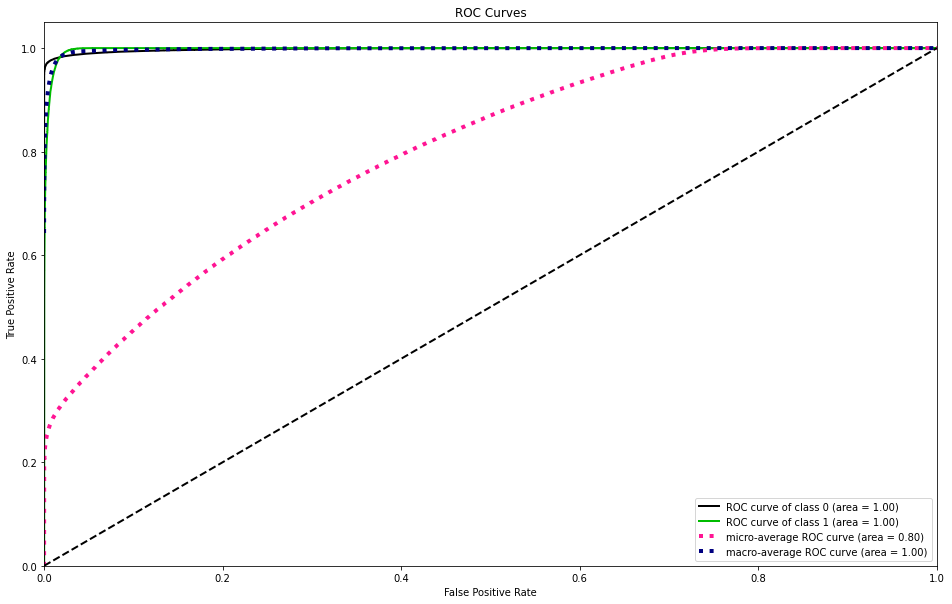

In [ ]:
prob_y_up_vis = clf.predict_proba(X_test)
skplt.metrics.plot_roc(real, prob_y_up_vis, figsize=(16, 10))
plt.show()

In [ ]:
train_scores, test_scores = list(), list()
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.2) 
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
for i in values:
    clf = LogisticRegression(random_state=i)
    clf.fit(xtr, ytr)
    # evaluate on the train dataset
    train_yhat = clf.predict(xtr)
    train_acc = accuracy_score(ytr, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = clf.predict(xte)
    test_acc = accuracy_score(yte, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.970, test: 0.905
>2, train: 0.970, test: 0.905
>3, train: 0.970, test: 0.905
>4, train: 0.970, test: 0.905
>5, train: 0.970, test: 0.905
>6, train: 0.970, test: 0.905
>7, train: 0.970, test: 0.905
>8, train: 0.970, test: 0.905
>9, train: 0.970, test: 0.905
>10, train: 0.970, test: 0.905
>11, train: 0.970, test: 0.905
>12, train: 0.970, test: 0.905
>13, train: 0.970, test: 0.905
>14, train: 0.970, test: 0.905
>15, train: 0.970, test: 0.905
>16, train: 0.970, test: 0.905
>17, train: 0.970, test: 0.905
>18, train: 0.970, test: 0.905
>19, train: 0.970, test: 0.905
>20, train: 0.970, test: 0.905


In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    479243
           1       0.70      0.88      0.78     18878

    accuracy                           0.98    498121
   macro avg       0.85      0.93      0.88    498121
weighted avg       0.98      0.98      0.98    498121



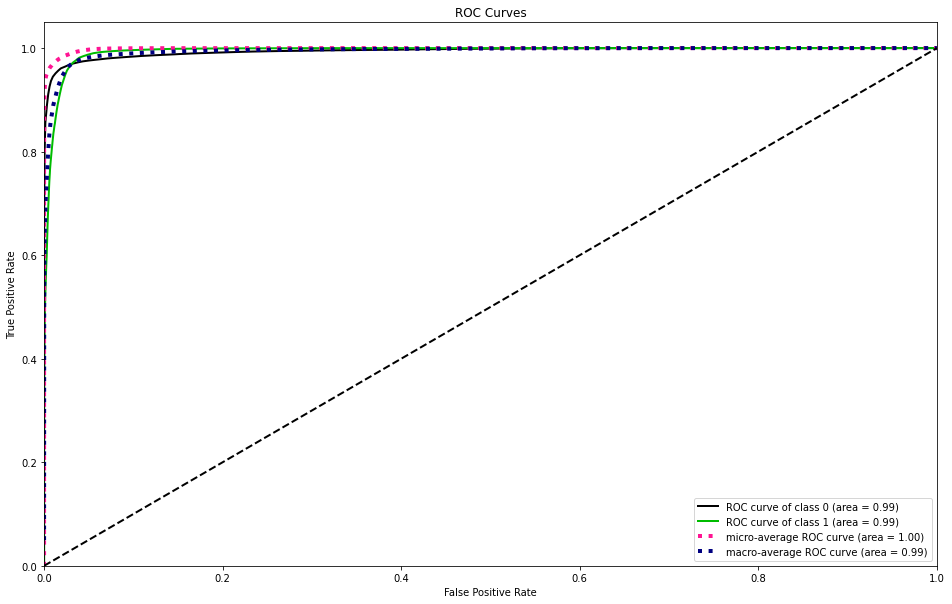

---------------------------- Actual Value--------------
---------------------------- |0 (no fraud)| 1 (fraud)--
Prediction-----|0 (no fraud) | 472109       | 2285
---------------|1 (fraud)    | 7134         | 16593


In [ ]:
print(classification_report(prediction, real))
prob_y_up_vis = clf.predict_proba(X_test)
skplt.metrics.plot_roc(real, prob_y_up_vis, figsize=(16, 10))
plt.show()
TN, FP, FN, TP = confusion_matrix(real, prediction).ravel()
print('---------------------------- Actual Value--------------')
print('---------------------------- |0 (no fraud)| 1 (fraud)--')
print('Prediction-----|0 (no fraud) |',TN,'      |',FP)
print('---------------|1 (fraud)    |',FN,'        |',TP)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    474914
           1       0.75      0.77      0.76     23207

    accuracy                           0.98    498121
   macro avg       0.87      0.88      0.87    498121
weighted avg       0.98      0.98      0.98    498121



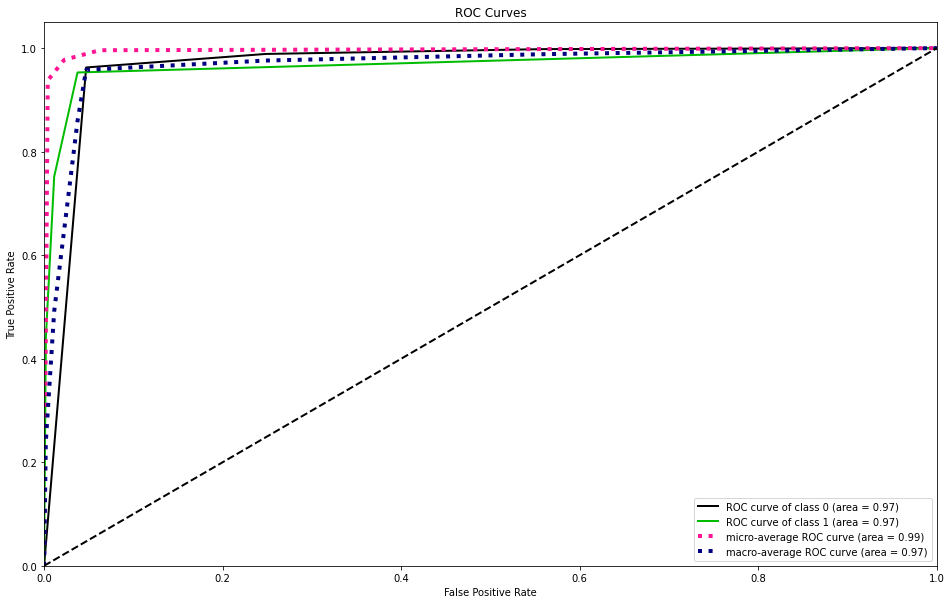

---------------------------- Actual Value--------------
---------------------------- |0 (no fraud)| 1 (fraud)--
Prediction-----|0 (no fraud) | 469022       | 5372
---------------|1 (fraud)    | 5892         | 17835


In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
prediction

print(classification_report(prediction, real))
prob_y_up_vis = clf.predict_proba(X_test)
skplt.metrics.plot_roc(real, prob_y_up_vis, figsize=(16, 10))
plt.show()
TN, FP, FN, TP = confusion_matrix(real, prediction).ravel()
print('---------------------------- Actual Value--------------')
print('---------------------------- |0 (no fraud)| 1 (fraud)--')
print('Prediction-----|0 (no fraud) |',TN,'      |',FP)
print('---------------|1 (fraud)    |',FN,'        |',TP)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    474460
           1       0.80      0.80      0.80     23661

    accuracy                           0.98    498121
   macro avg       0.89      0.90      0.89    498121
weighted avg       0.98      0.98      0.98    498121



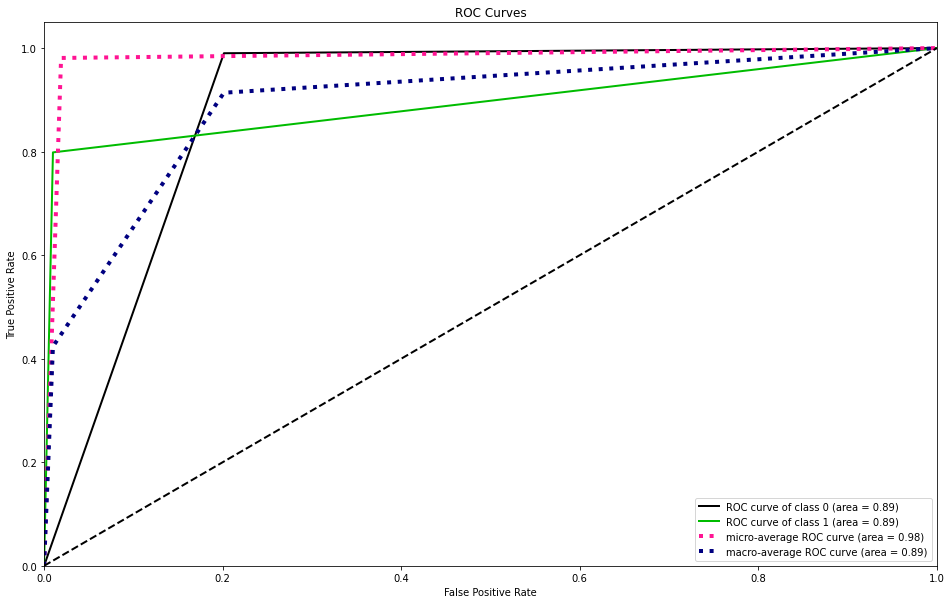

---------------------------- Actual Value--------------
---------------------------- |0 (no fraud)| 1 (fraud)--
Prediction-----|0 (no fraud) | 469680       | 4714
---------------|1 (fraud)    | 4780         | 18947


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
prediction

print(classification_report(prediction, real))
prob_y_up_vis = clf.predict_proba(X_test)
skplt.metrics.plot_roc(real, prob_y_up_vis, figsize=(16, 10))
plt.show()
TN, FP, FN, TP = confusion_matrix(real, prediction).ravel()
print('---------------------------- Actual Value--------------')
print('---------------------------- |0 (no fraud)| 1 (fraud)--')
print('Prediction-----|0 (no fraud) |',TN,'      |',FP)
print('---------------|1 (fraud)    |',FN,'        |',TP)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    476369
           1       0.80      0.87      0.83     21752

    accuracy                           0.98    498121
   macro avg       0.90      0.93      0.91    498121
weighted avg       0.99      0.98      0.98    498121



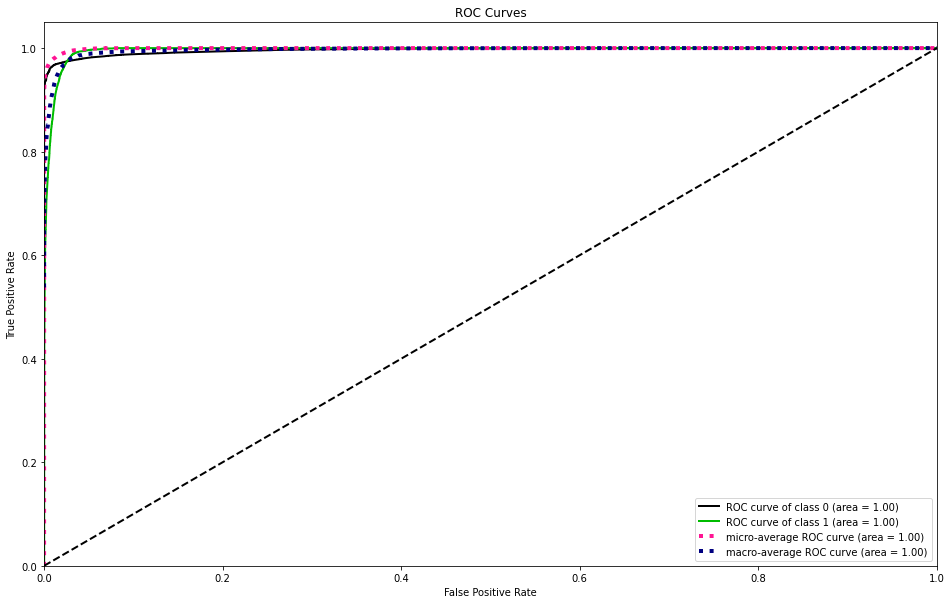

---------------------------- Actual Value--------------
---------------------------- |0 (no fraud)| 1 (fraud)--
Prediction-----|0 (no fraud) | 471549       | 2845
---------------|1 (fraud)    | 4820         | 18907


In [ ]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
prediction

print(classification_report(prediction, real))
prob_y_up_vis = clf.predict_proba(X_test)
skplt.metrics.plot_roc(real, prob_y_up_vis, figsize=(16, 10))
plt.show()
TN, FP, FN, TP = confusion_matrix(real, prediction).ravel()
print('---------------------------- Actual Value--------------')
print('---------------------------- |0 (no fraud)| 1 (fraud)--')
print('Prediction-----|0 (no fraud) |',TN,'      |',FP)
print('---------------|1 (fraud)    |',FN,'        |',TP)